In [0]:
!pip install pyeasyga
!pip install sklearn-genetic
!pip install joblib
!pip install scikit-plot
!pip install pygad

  Created wheel for pyeasyga: filename=pyeasyga-0.3.1-py2.py3-none-any.whl size=6774 sha256=1604a6f829d6f8d46218f10ce870dd49b73b2fb2be241fbc938b95f817bc5546
  Stored in directory: /root/.cache/pip/wheels/ef/cf/ef/7aff9fcd6c1e59dc276182f29a32e7c197665dd5eb547f30e6
Successfully built pyeasyga
     |████████████████████████████████| 163kB 7.0MB/s 
  Created wheel for sklearn-genetic: filename=sklearn_genetic-0.2-py2.py3-none-any.whl size=6695 sha256=cb2670248b7a0c4aba41e5297bafaf5c83be982c64c2964c6009baede3e74383
  Stored in directory: /root/.cache/pip/wheels/e0/0d/a7/698bc5a79bdf76ad619116359c01dcc40298b8b275279fd826
Successfully built sklearn-genetic


In [0]:
import numpy as np
import pandas as pd
#from tpot import TPOTClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from pyeasyga.pyeasyga import GeneticAlgorithm
from genetic_selection import GeneticSelectionCV
import joblib
import matplotlib.pyplot as plt
import scikitplot as skplt
import pygad

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0

In [0]:
xls = pd.ExcelFile('CTG.xls')
data = pd.read_excel(xls, 'Data')

In [0]:
feat_num = 21
classes = 2
feature_names = np.array([data[i][0] for i in range(1, feat_num+classes+1)])
# 2126 examples
N = 2126

# split into 80: 20 for test: train data
train_num = int(N*0.8)

# load train data
train_data = np.array([[data[i][j] for i in range(1, feat_num+1)]
                                 for j in range(1, train_num+1)])
print("hi")
print(train_data)
# load train labels
train_labels = np.array([data[23][i] for i in range(1, train_num+1)])
# load test data
test_data = np.array([[data[i][j] for i in range(1, feat_num+1)]
                                 for j in range(train_num+1, N+1)])
# load test labels
test_labels = np.array([data[23][i] for i in range(train_num+1, N+1)])

# view data for first example
print("Example 1 features:\n")
for i in range(feat_num):
  print(feature_names[i], ' '*(8-len(feature_names[i])), '|', train_data[0][i], ' '*(6-len(str(train_data[0][i]))))
# view labels for first example
print("\nLabels:\n")
print(feature_names[22], ' '*(8-len(feature_names[i])), '|', train_labels[0])

hi
[[1.20000000e+02 0.00000000e+00 0.00000000e+00 ... 1.21000000e+02
  7.30000000e+01 1.00000000e+00]
 [1.32000000e+02 6.37958533e-03 0.00000000e+00 ... 1.40000000e+02
  1.20000000e+01 0.00000000e+00]
 [1.33000000e+02 3.32225914e-03 0.00000000e+00 ... 1.38000000e+02
  1.30000000e+01 0.00000000e+00]
 ...
 [1.37000000e+02 8.71632330e-03 7.92393027e-04 ... 1.50000000e+02
  5.20000000e+01 1.00000000e+00]
 [1.37000000e+02 8.27966881e-03 9.19963201e-04 ... 1.51000000e+02
  5.50000000e+01 1.00000000e+00]
 [1.37000000e+02 6.41613199e-03 1.83318057e-03 ... 1.50000000e+02
  4.90000000e+01 1.00000000e+00]]
Example 1 features:

LB        | 120.0  
AC        | 0.0    
FM        | 0.0    
UC        | 0.0    
DL        | 0.0    
DS        | 0.0    
DP        | 0.0    
ASTV      | 73.0   
MSTV      | 0.5    
ALTV      | 43.0   
MLTV      | 2.4    
Width     | 64.0   
Min       | 62.0   
Max       | 126.0  
Nmax      | 2.0    
Nzeros    | 0.0    
Mode      | 120.0  
Mean      | 137.0  
Median    | 121.

In [0]:
#Data normalization:
n_xtrain = train_data/np.max(train_data)
n_xtest = test_data/np.max(test_data)
y_train = train_labels-1
y_test = test_labels-1
print("Train: ",n_xtrain)
print("Label: ",y_train)

Train:  [[5.04201681e-01 0.00000000e+00 0.00000000e+00 ... 5.08403361e-01
  3.06722689e-01 4.20168067e-03]
 [5.54621849e-01 2.68049804e-05 0.00000000e+00 ... 5.88235294e-01
  5.04201681e-02 0.00000000e+00]
 [5.58823529e-01 1.39590720e-05 0.00000000e+00 ... 5.79831933e-01
  5.46218487e-02 0.00000000e+00]
 ...
 [5.75630252e-01 3.66232071e-05 3.32938247e-06 ... 6.30252101e-01
  2.18487395e-01 4.20168067e-03]
 [5.75630252e-01 3.47885244e-05 3.86539160e-06 ... 6.34453782e-01
  2.31092437e-01 4.20168067e-03]
 [5.75630252e-01 2.69585378e-05 7.70243936e-06 ... 6.30252101e-01
  2.05882353e-01 4.20168067e-03]]
Label:  [1 0 0 ... 0 0 0]


In [0]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(n_xtrain, y_train)  

#Predict the response for test dataset
y_pred = gnb.predict(n_xtest)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8380281690140845


In [0]:
# save the model to disk
filename = 'CTG2.sav'
joblib.dump(gnb, filename)
 
# load the model from disk
loadgnb = joblib.load(filename)

In [0]:
#Predict the response for test dataset
y_pred = loadgnb.predict(n_xtest)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8380281690140845


In [0]:
def fitness_func(solution, solution_idx):
    fitness = 1/(metrics.mean_squared_error(y_test, solution))
    return fitness

num_generations = 100
num_parents_mating = 50

fitness_function = fitness_func

sol_per_pop = 70
num_genes = 21

init_range_low = -2
init_range_high = 5

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "scramble"
mutation_percent_genes = 10

def callback_gen(ga_instance):
    print("Generation : ", ga_instance.generations_completed)
    print("Fitness of the best solution :", ga_instance.best_solution()[1])

Streaming output truncated to the last 5000 lines.
 -0.15551173  4.74630692  3.15079582 -1.71430125  1.66277938  3.26186612
  2.13288187  1.29399622  4.69332057  1.29782688 -1.20435315  4.64018294
  3.59808194  2.7473827   2.67034522]
[ 4.90958762  4.93758757  3.90633634  3.31862731 -1.34883625 -1.91100617
 -1.4870146   2.85401245  1.33302743 -1.39775078 -1.86983414  4.26439466
  4.95072122  3.69529932 -0.93459221  1.20647999  4.05390446 -0.8226713
  4.16943635  3.19509247  1.10854591]
[-0.94526773  2.96849824  3.34056093  3.57481964 -0.10626577  2.68943857
  2.69948364  2.45878079  1.13633318  2.13734193  2.6659687   3.64701607
  4.31397526  3.54157628  1.70539427  0.27814653 -0.50094907  0.83930631
 -0.50571375  1.06874802  2.44973108]
[ 2.47482162  2.75133226  1.26538845  4.40779124 -1.11490501  3.30863421
  2.23918995  1.08218868 -0.4223676   3.45451737  4.51902204 -0.13068054
 -1.19473179  2.10964861  1.4331028  -0.01041656  1.62748948  2.82139514
  2.40464157  4.58623609 -0.80581

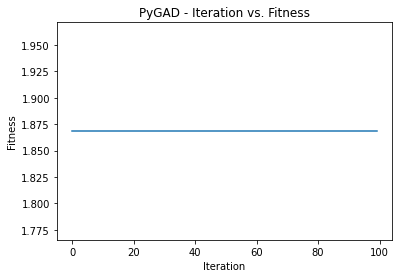

[ 4.96585425  3.89973739 -1.08397964 -1.39309899  3.37171158  3.84357681
  0.21670373  1.64879295  1.82213277 -1.81537079 -0.97085085  4.33738036
  1.21465133  3.52961779  2.20218019  2.0362889   2.63132128 -1.5134529
 -0.24604304  3.69481219  1.67205847]
[ 4.96585425  0.21670373 -1.39309899 -1.08397964  1.82213277 -1.81537079
  3.89973739 -0.97085085  3.37171158  3.84357681  1.64879295  4.33738036
  1.21465133  3.52961779  0.06617098  1.76446265  2.0561765   4.59805619
  4.593843   -0.30312406 -0.55073221]
[-0.11642156 -0.95494168  0.02692574  1.3540627   2.51467885 -1.58548012
 -1.31798303 -0.31347747  2.07820103 -1.28500535  1.47046992 -1.61241078
  3.19840934  4.59071935 -1.17640119  3.83946365 -1.92625165  3.82340931
  0.27606891  4.14411606 -1.15592117]
[ 3.51332114  3.92204411  0.69560205  4.29976129  4.49815494  0.11849876
  2.60436231  4.9781941  -1.65264112  2.42427893 -1.59194979 -1.9486425
 -0.62795637 -0.68073303  3.56048381 -0.01420442  1.50946586  4.71781539
  1.75166086

In [0]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating, 
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, 
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)
ga_instance.run()
ga_instance.plot_result()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))
if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))


In [0]:
filename = 'genetic'
ga_instance.save(filename=filename)
loaded_ga_instance = pygad.load(filename=filename)
ga_instance.run()
ga_instance.plot_result()
print(loaded_ga_instance.best_solution())

In [0]:
selector = GeneticSelectionCV(loadgnb,
                              cv=5,
                              verbose=1,
                              scoring="accuracy",
                              max_features=21,
                              n_population=10,
                              crossover_proba=0.1,
                              mutation_proba=0.1,
                              n_generations=100,
                              crossover_independent_proba=0.05,
                              mutation_independent_proba=0.05,
                              tournament_size=3,
                              n_gen_no_change=10,
                              caching=True,
                              n_jobs=1)
selector = selector.fit(n_xtrain, y_train)
y_pred = selector.predict(n_xtest)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
skplt.metrics.plot_calibration_curve(y_pred, selector.predict_log_proba(y_pred), clf_names = "Naive bayes")
plt.show()

GaussianNB(priors=None, var_smoothing=1e-09)
Selecting features with genetic algorithm.
gen	nevals	avg                      	std                    	min                    	max          
0  	10    	[ 0.80141176 11.        ]	[0.02928585 2.32379001]	[0.75058824 7.        ]	[ 0.84 15.  ]
1  	0     	[ 0.81352941 10.2       ]	[0.01765294 1.77763888]	[0.78 9.  ]            	[ 0.83705882 15.        ]
2  	3     	[0.82994118 9.6       ]  	[0.00859891 0.48989795]	[0.81941176 9.        ]	[ 0.83705882 10.        ]
3  	3     	[0.83705882 9.9       ]  	[0.  0.3]              	[0.83705882 9.        ]	[ 0.83705882 10.        ]
4  	1     	[0.83788235 9.5       ]  	[0.00247059 0.5       ]	[0.83705882 9.        ]	[ 0.84529412 10.        ]
5  	2     	[0.84058824 9.3       ]  	[0.00558669 0.64031242]	[0.83294118 9.        ]	[ 0.85176471 11.        ]
6  	2     	[0.84064706 9.1       ]  	[0.00705122 0.7       ]	[0.82529412 8.        ]	[ 0.85176471 11.        ]
7  	2     	[0.84641176 9.6       ]  	[0.00425364

ValueError: ignored